# Exploritory Analysis of Stack Overflow's Yearly Survey 2023.

## Analyzing the Correlation Between Demographics, Mental Health, and Workplace Culture in a Survey of Stack Overflow Members.

  Stack Overflow, founded in 2008, is a website where people ask and answer programming questions to help each other out. It is widely used by programmers of all levels and backgrounds,but it is particularly popular among software developers who work with web development, mobile development, and data science.  It publishes the data of the survey of its members yearly.

# General Demographics Overview
## Age, Gender, Years code, Mental Health , Education Level, Language Used

In [ ]:
Looking at Df_45

In [1]:
# This cell is to import need libraries/packages and datasets. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets have been cleaned in previous notebooks.

#df_whole is a copy of the original Data frame, with large amounts of cleaning and parsing to allow for plotting.
df_whole = pd.read_csv("df_whole.csv")
#df_lang is a dataframe modified from df_whole, the answer to the languages used question have been exploaded out to get counts per mention.
df_lang = pd.read_csv("df_lang.csv")
#df_whole_45 is a subset of the original data frame that only includes the top 45 countries by participation.
df_whole_45 = pd.read_csv('df_whole_45.csv')
#df_45 is a new data frame created from df_whole_45 that has means, medians and participation counts for categories grouped by country.
df_45 = pd.read_csv("df_45_clean.csv")


#df is the original df.
df = pd.read_csv('data/survey_results_public.csv')


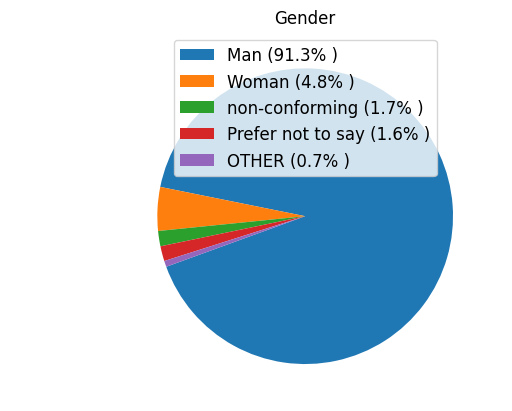

Participation in Gender question is: 70505 / 71331


<Figure size 640x480 with 0 Axes>

In [2]:
#Gender Chart Creation Code:

#df_copy
gender =df_whole.value_counts('Gender')

# Get value counts without the "Man;Woman" category
gender.drop("Man;Woman", inplace=True)

# Function putting counts into percentages
percentages = []
for count in gender:
    percentage = count / sum(gender) * 100
    percentages.append(f'{percentage:.1f}% ')
    
#creating pie chart
plt.pie(gender, labels=gender.index, autopct='', startangle=200, textprops={'color': 'w', 'fontsize': 12})
plt.title('Gender')

# add percentages
plt.legend(labels=[f'{l} ({p})' for l, p in zip(gender.index, percentages)], prop={'size': 12}, loc=9)
# Move legend outside of the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#saving as image- still not working!!!
GenderSOF = plt.savefig('GenderSOF.png')

# Recording participation: 
x = df_whole['Gender'].count()
y = len(df_whole)

print(f'Participation in Gender question is: {x} / {y}')


The gender distribution of the individuals shows 91.3% male identification. This indicates a significant gender disparity within the tech industry, with men being the dominant group. However, it is important to note that this underrepresentation of women in tech is a well-known issue.

Contrary to the observed gender distribution from the SOF data, other reputable sources report a higher percentage of women in the tech industry. According to the National Center for Women & Information Technology (NCWIT) in the United States, women accounted for approximately 26% of the computing workforce in 2020. 

The numbers from SOF are global, and as we will see later are also mostly developers. While there are inumerable reasons for statistics to vary from source to source. This is somethinig to keep in mind when you hear/ see this data used in descision making.


##Need to move to end when ready (References on the percentage of women in the tech industry:

National Center for Women & Information Technology (NCWIT): NCWIT produces research and data related to women's participation in computing and technology. You can find their reports and statistics on their website: https://www.ncwit.org/

Eurostat: Eurostat is the statistical office of the European Union, and they provide data and reports on various topics, including the ICT sector and gender representation. You can find their data on the ICT sector and employment by gender on their website: https://ec.europa.eu/eurostat

World Economic Forum (WEF): The WEF publishes an annual report called the Global Gender Gap Report that examines gender disparities across various sectors, including technology. The report provides insights into gender gaps in different countries and industries. You can find the report on the WEF website: https://www.weforum.org/reports/global-gender-gap-report-2020  )

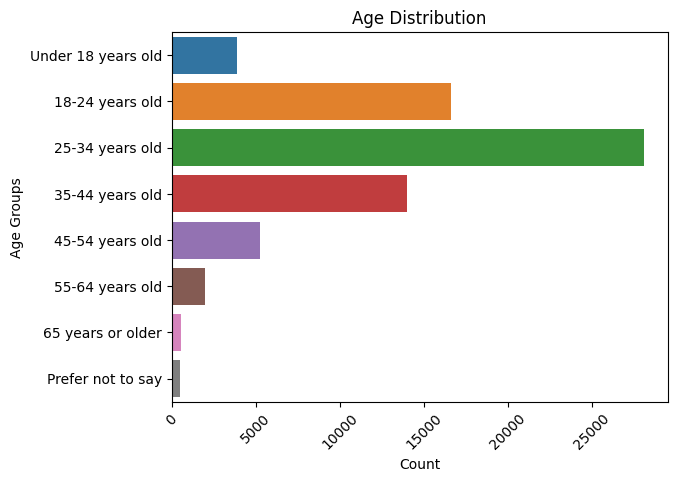

In [3]:
#Age Plot Creation Code:

age_counts = df['Age'].value_counts()

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

sns.barplot(x=age_counts, y=age_counts.index, order=age_order, orient='h')

plt.ylabel('Age Groups')
plt.xlabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

Discussion on age and years code:

12.251307285752338

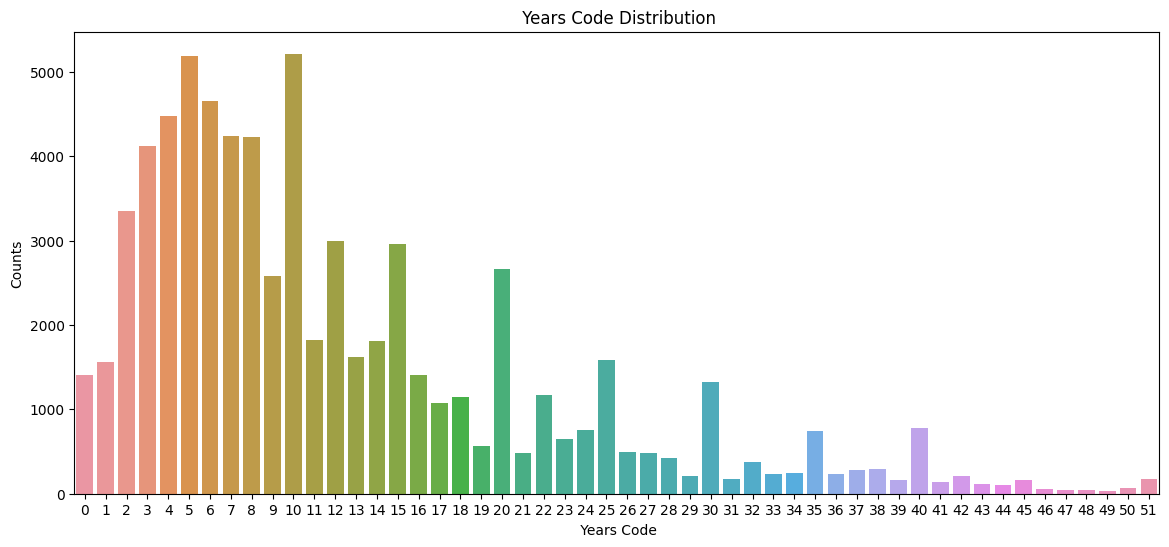

In [4]:
#Years Code Plot Creation Code:
df_whole_45['YearsCode'].unique()
display(df_whole['YearsCode'].mean())
df_whole['YearsCode'].median() 


Years_Code_Counts = df_whole['YearsCode'].value_counts()


# Increase the figure size
plt.figure(figsize=(14, 6))

sns.barplot(y=Years_Code_Counts, x=Years_Code_Counts.index, )


plt.xlabel(' Years Code')
plt.ylabel('Counts')
plt.title(' Years Code Distribution')
#plt.xticks(rotation=45)
plt.show()

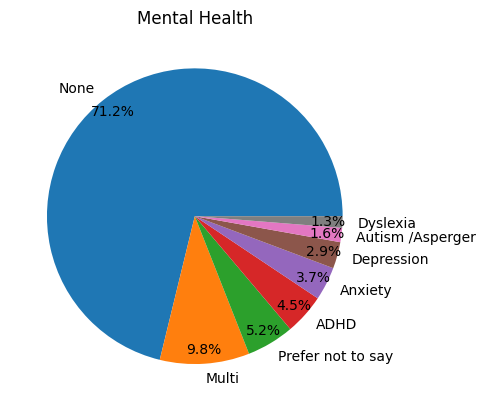

Participation in Mental Health question is: 66198 / 71331


In [5]:
#Mental Health Plot Creation Code:

# create the series
s = df_whole['MentalHealth'].value_counts()

# Get value counts without the "in your own words" category
s.drop("Or, in your own words:", inplace=True)

# plot as a pie chart
plt.pie(s, labels=s.index, autopct='%1.1f%%', pctdistance=.9)
plt.title('Mental Health')
plt.show()

# Recording participation: 
x = df_whole['MentalHealth'].count()
y = len(df_whole)

print(f'Participation in Mental Health question is: {x} / {y}')


Participation in Ed Level question is: 71204 / 71331


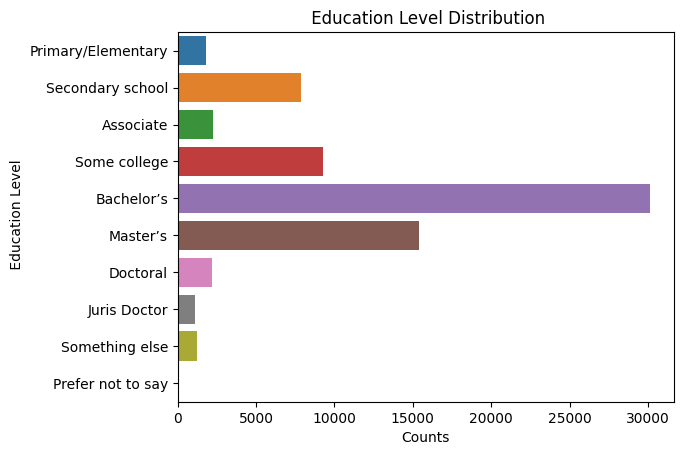

In [6]:
#Education Plot Creation Code:


# Recording participation: 
xx = df_whole['EdLevel'].count()
yy = len(df_whole)

print(f'Participation in Ed Level question is: {xx} / {yy}')

Ed_level_order = [
    'Primary/Elementary',
    'Secondary school',
    'Associate',
    'Some college',
    "Bachelor’s" ,
    "Master’s",
    "Doctoral",
    'Juris Doctor',
    'Something else',
    'Prefer not to say'
]


Ed_Level_Counts = df_whole['EdLevel'].value_counts()


sns.barplot(y=Ed_Level_Counts.index, x=Ed_Level_Counts, order = Ed_level_order, orient='h')

plt.ylabel(' Education Level')
plt.xlabel('Counts')
plt.title(' Education Level Distribution')
plt.show()

Participation in Language Have Worked With question is: 70593 / 71331


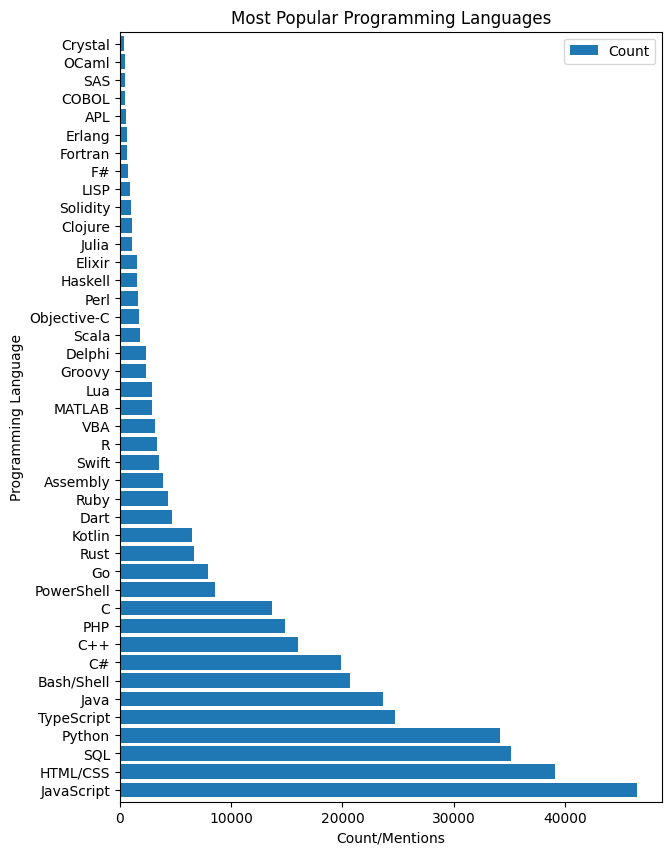

In [10]:
#Popular Programming Languages Plot Creation Code:
# plot the bar graph
df_lang.plot(kind='barh', x='LanguageHaveWorkedWith', y='Count', figsize=(7, 10), width=0.8)

# set the title and labels for the graph
plt.title('Most Popular Programming Languages')
plt.xlabel('Count/Mentions')
plt.ylabel('Programming Language')

# Recording participation:
xxx = df_whole['LanguageHaveWorkedWith'].count()
yyy = len(df_whole)

print(f'Participation in Language Have Worked With question is: {xxx} / {yyy}')

plt.show()

In [12]:
# Count the rows containing 'Developer' in the 'DevType' column
count = df['DevType'].str.contains('Developer').sum()

# Print the count
print(f"Total number of rows containing 'Developer': {count}")

# Count the total number of non-null rows in the 'DevType' column
total_non_na_rows = df['DevType'].count()

# Print the count
print(f"Total number of non-null rows in 'DevType': {total_non_na_rows}")

#Print percent developers

perc = (count/total_non_na_rows)*100

print(f"Percentage Developers: {perc:.2f}%")

Total number of rows containing 'Developer': 51926
Total number of non-null rows in 'DevType': 61302
Percentage Developers: 84.71%


# By Country Demographics Overview
## Age, Years code, Salary , Education Level

In [13]:
df_45


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
0,United States of America,13543,58.23%,85.87%,"$160,561.30","$140,000.00",60.58%,16.9,14.0,36.3,Bachelor’s
1,India,6639,39.84%,73.79%,"$38,270.20","$18,223.80",31.81%,8.8,8.0,28.2,Bachelor’s
2,Germany,5395,34.39%,83.97%,"$98,732.30","$69,677.40",53.20%,15.6,14.0,33.8,Master’s
3,United Kingdom of Great Britain and Northern I...,4190,42.85%,85.32%,"$132,061.60","$79,268.30",61.17%,16.4,14.0,34.8,Bachelor’s
4,Canada,2490,62.40%,84.18%,"$107,117.40","$86,861.30",56.99%,16.0,14.0,35.0,Bachelor’s
5,France,2328,23.03%,83.93%,"$78,165.20","$51,612.90",58.33%,13.8,12.0,32.6,Master’s
6,Brazil,2109,66.77%,88.62%,"$39,287.40","$25,142.90",60.41%,12.2,10.0,31.5,Bachelor’s
7,Poland,1732,54.61%,83.83%,"$57,862.60","$46,419.10",56.29%,12.4,11.0,31.6,Master’s
8,Netherlands,1555,18.74%,85.79%,"$93,454.00","$64,828.00",57.04%,15.3,13.0,33.8,Bachelor’s
9,Spain,1521,49.82%,88.95%,"$94,820.50","$48,387.10",64.63%,13.9,12.0,34.2,Bachelor’s


##DF_45 is a data frame created in "General Demographics by Country". It focuses on the 45 countries in the survey that contained that largest participants. the numer 45 was aburtrary and chosen to save time when converting currencies. 


